# Jupyter Notebooks

### &emsp;- an IDE (integrated development environment) for Python
### &emsp;- completely open-Source
### &emsp;- used extensively In academia and industry
### &emsp;- popular with data scientists and ML engineers
### &emsp;- oriented around "cells" ( documentation, code, or output )
### &emsp;- For example, this sentence resides in a editable documentation cell.

In [1]:
# This sentence is in a comment in an editable code cell

encoded = "\x54\x68\x69\x73\x20\x49\x73\x20\x41\x6E\x20\x4F\x75\x74\x70\x75\x74\x20\x43\x65\x6C\x6C"

print(encoded)


This Is An Output Cell


# What's Our Goal With Survival Analysis Prediction

<img src="images/predictor.png">

# Examples:

## &emsp;Health Outcomes

### &emsp;&emsp;-&emsp;predict patient survival time by symptoms, age, genetic expression activity, ...

## &emsp;Customer Activity

### &emsp;&emsp;-&emsp;predict when customer might cancel a subscription based on their product rating, ...

## &emsp;Machine Failure

### &emsp;&emsp;-&emsp;predict part failure from its age, temperature, lot,  ...



# Time-To-Event Is What We Want, But Realistically...

<img src="images/predictor_prob.png">

# Let's Now Train A Machine Learning Model Using A Typical Pipeline...


<img src="images/pipeline.png">

# Work-Through Example: Predicting Cancer Deaths

### -&emsp;dataset is cancer death ddata from 2012 called METABRIC

### -&emsp;contains about 2000 patient records with ***Gene Expression*** data

### -&emsp;goal is to train an ML model that can predict survival time of patients in clinical trial
 


# Load The Dataset...
<img src="images/load-data.png">

In [2]:
#
# Prepare this notebook by "import"ing the python packages we will need
#

# I've pre-package a bunch of high-level codee functions for the survival analysis tutorial/workshop.
# I recommend you explore the code in this python package at a later time!
import survival_analysis

import importlib
importlib.reload(survival_analysis)

<module 'survival_analysis' from '/Users/gwilliams/Projects/SEEMAP2023/seemap2023/survival_analysis.py'>

In [3]:
#
# Load the dataset
#

survival_data = survival_analysis.get_cancer_death_data()

print("dataset shape=", survival_data.shape)


dataset shape= (1904, 12)


# Explore The Dataset...
<img src="images/explore-data.png">

In [4]:
#
# Explore the data
#

survival_data.head(20)

,MKI67,EGFR,PGR,ERBB2,hormone trtmt,radiothrpy,chemothrpy,ER-pos,age,days,died,ID
0,5.603834,7.811392,10.797988,5.967607,1.0,1.0,0.0,1.0,56.840000,99.333336,0,patient_0
1,5.284882,9.581043,10.204620,5.664970,1.0,0.0,0.0,1.0,85.940002,95.733330,1,patient_1
2,5.920251,6.776564,12.431715,5.873857,0.0,1.0,0.0,1.0,48.439999,140.233337,0,patient_2
3,6.654017,5.341846,8.646379,5.655888,0.0,0.0,0.0,0.0,66.910004,239.300003,0,patient_3
4,5.456747,5.339741,10.555724,6.008429,1.0,0.0,0.0,1.0,67.849998,56.933334,1,patient_4
5,5.425826,6.331182,10.455145,5.749053,1.0,1.0,0.0,1.0,70.519997,123.533333,0,patient_5
6,5.624060,5.679635,9.819317,5.613775,1.0,1.0,0.0,1.0,49.919998,261.200012,0,patient_6
7,5.916774,5.289600,12.981733,6.009507,0.0,1.0,0.0,1.0,64.610001,143.000000,1,patient_7
8,5.865741,6.738176,10.850687,5.596416,0.0,0.0,0.0,1.0,68.209999,150.600006,1,patient_8
9,7.125732,5.484323,10.498713,6.128778,0.0,0.0,0.0,0.0,80.339996,49.433334,1,patient_9



# A Note About The Dataset Columns...

| Factor | Type | Description |
| --- | --- | --- |
| MKI67  | numeric | gene expression for MKI67 |
| EGFR  | numeric | gene expression for EGFR  |
| PGR  | numeric | gene expression for PGR  |
| ERBB2  | numeric | gene expression for ERBB2  |
| hormone trtmnt  | binary | patient underwent hormone treatment |
| radiothrpy  | binary | patient underwent radiotherapy |
| chemothrpy  | binary | patient underwent chemotherapy  |
| ER-pos  | binary | patient underwent ER-positive therapy |
| age  | binary | patient age |
| duration  | numeric | days survived |
| event  | binary | patient died during study |

### Obviously, for customer churn or machine failure prediction the columns will be different...

In [5]:
#
# Explore the "numeric columns
#

survival_data[['MKI67', 'EGFR', 'PGR', 'ERBB2', 'age', 'days']].describe()

,MKI67,EGFR,PGR,ERBB2,age,days
count,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000
mean,6.210828,6.237204,10.765365,5.872816,61.087055,125.025124
std,0.862967,1.020871,1.357359,0.341254,12.978711,76.334198
min,5.158794,4.860645,6.372949,5.101093,21.930000,0.000000
25%,5.692096,5.408728,9.969681,5.622290,51.375001,60.824999
50%,5.949283,5.877591,10.530301,5.816998,61.769999,114.900002
75%,6.458780,6.899220,11.159306,6.058293,70.592497,184.474995
max,14.443632,9.932116,14.643900,7.658863,96.290001,355.200012


# Transform The Dataset...
<img src="images/transform-data.png">

In [6]:
# Transform the dataset for our machine learning model...

train_dataset, validation_dataset, test_dataset = survival_analysis.transform_data()

print("training dataset shape=", train_dataset.shape)

print("validation dataset shape=", validation_dataset.shape)

print("test dataset shape=", test_dataset.shape)

training dataset shape= (1523, 12)
validation dataset shape= (381, 12)
test dataset shape= (381, 12)


# So Why Do We Split The Original Dataset?

### -&emsp;Training Dataset: We usually keep most of it for training the model

### -&emsp;Validation Dataset: dWe take a small portion to measure how well the training is going ( and when to stop! )

### -&emsp;Test Dataseet: We keep a "hold-out" dataset to evaluate the final model



# Choose A Machine Learning Model...
<img src="images/choose-model.png">

In [7]:
# We will try a small neural network here called a multi-layer perceptron.
# Let's print out the "architecture" and discuss what the layers mean...

ml_model = survival_analysis.choose_multilayer_perceptron()

print("model architecture=", ml_model)

model architecture= MLPVanilla(
  (net): Sequential(
    (0): DenseVanillaBlock(
      (linear): Linear(in_features=9, out_features=32, bias=True)
      (activation): ReLU()
      (batch_norm): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (1): DenseVanillaBlock(
      (linear): Linear(in_features=32, out_features=32, bias=True)
      (activation): ReLU()
      (batch_norm): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (2): Linear(in_features=32, out_features=10, bias=True)
  )
)


# Prepare To Train The Model...

<img src="images/prepare-model.png">


In [8]:
# There are some "hyper-parameters" we will use to prepare the training.
# Let's discuss what these mean...

epochs, stop_criteria = survival_analysis.prepare_training()

print("training epochs=", epochs)
print("stop_criteria=", stop_criteria)

training epochs= 100
stop_criteria= early-stopping


# Train The Model...

<img src="images/train-model.png">

0:	[0s / 0s],		train_loss: 3.0536,	val_loss: 2.8333
1:	[0s / 0s],		train_loss: 2.7086,	val_loss: 2.5109
2:	[0s / 0s],		train_loss: 2.3287,	val_loss: 2.0662
3:	[0s / 0s],		train_loss: 1.8952,	val_loss: 1.6574
4:	[0s / 0s],		train_loss: 1.5715,	val_loss: 1.4947
5:	[0s / 0s],		train_loss: 1.4254,	val_loss: 1.4791
6:	[0s / 0s],		train_loss: 1.3891,	val_loss: 1.4804
7:	[0s / 0s],		train_loss: 1.3693,	val_loss: 1.4496
8:	[0s / 0s],		train_loss: 1.3427,	val_loss: 1.4274
9:	[0s / 0s],		train_loss: 1.3355,	val_loss: 1.4239
10:	[0s / 0s],		train_loss: 1.3116,	val_loss: 1.4266
11:	[0s / 0s],		train_loss: 1.3070,	val_loss: 1.4198
12:	[0s / 0s],		train_loss: 1.3079,	val_loss: 1.4167
13:	[0s / 0s],		train_loss: 1.3008,	val_loss: 1.4171
14:	[0s / 0s],		train_loss: 1.2872,	val_loss: 1.4246
15:	[0s / 0s],		train_loss: 1.3027,	val_loss: 1.4274
16:	[0s / 0s],		train_loss: 1.2815,	val_loss: 1.4292
17:	[0s / 0s],		train_loss: 1.2816,	val_loss: 1.4291
18:	[0s / 0s],		train_loss: 1.2742,	val_loss: 1.4324
19:

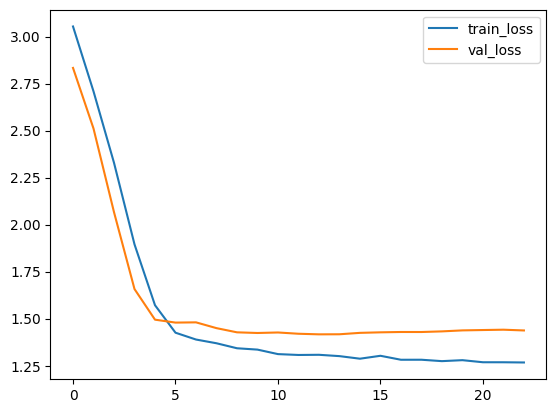

In [9]:
# Let's go ahead and train the model and discuss the output

trained_model = survival_analysis.train_model()

# Evaluate The Model...

<img src="images/eval-model.png">

In [10]:
# Remember, we removed some of the original data for testing our final model.
# It was not used in training the model and contains "ground truth" data - that is,
# we know how long the patient survived.  We can use to determine how well our 
# model predicts survival.

# Let's look at some of that 'test data'...

test_dataset.iloc[0:10,:] 

,MKI67,EGFR,PGR,ERBB2,hormone trtmt,radiothrpy,chemothrpy,ER-pos,age,days,died,ID
364,5.505141,8.638374,10.849506,6.638455,0.0,0.0,0.0,1.0,80.330002,69.099998,1,patient_364
577,5.567882,5.459702,13.863100,6.231246,0.0,1.0,1.0,0.0,46.759998,35.633335,1,patient_577
1238,5.933456,6.357396,11.204230,5.982156,0.0,0.0,0.0,1.0,50.070000,252.966660,0,patient_1238
329,5.343498,5.601614,11.148868,6.159947,1.0,1.0,0.0,1.0,63.430000,222.199997,0,patient_329
1185,5.970478,5.847399,11.653483,5.646510,0.0,0.0,0.0,1.0,81.760002,107.766670,1,patient_1185
907,5.631753,6.977419,10.330307,5.703781,1.0,1.0,1.0,1.0,43.389999,131.066666,0,patient_907
631,5.403924,6.140525,11.485667,5.500154,0.0,1.0,0.0,1.0,59.230000,263.033325,0,patient_631
1000,6.758899,6.168967,9.798991,5.110848,0.0,1.0,0.0,1.0,57.360001,86.900002,0,patient_1000
912,6.085110,5.445497,11.361155,6.313169,1.0,0.0,0.0,1.0,77.940002,151.166672,1,patient_912
1709,6.994829,5.671229,9.288567,6.408274,1.0,1.0,1.0,0.0,64.269997,194.100006,1,patient_1709


In [11]:
# Let's focus on the first two patients (patient 379 and 1711)

two_patients = test_dataset[ \
        (test_dataset['ID']=='patient_364') | (test_dataset['ID']=='patient_577') ]

two_patients

,MKI67,EGFR,PGR,ERBB2,hormone trtmt,radiothrpy,chemothrpy,ER-pos,age,days,died,ID
364,5.505141,8.638374,10.849506,6.638455,0.0,0.0,0.0,1.0,80.330002,69.099998,1,patient_364
577,5.567882,5.459702,13.863100,6.231246,0.0,1.0,1.0,0.0,46.759998,35.633335,1,patient_577


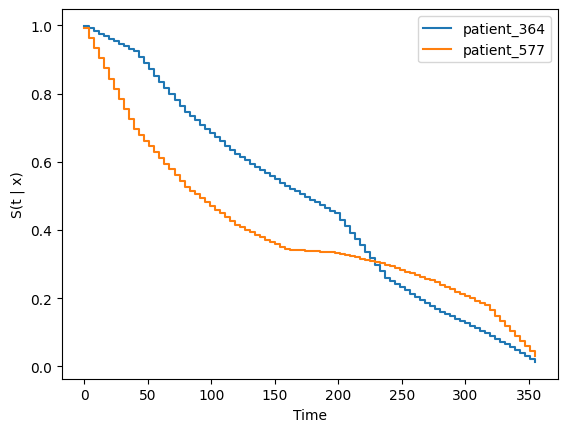

In [12]:
# Let's look at the predicted survival probability curve for these two patients and discuss

survival_analysis.predict( two_patients )

In [13]:
# We can perform this qualitative metric, called the concordance index, on the entire 
# "held-out" test set to get the overall quality of the predictive model.

model_quality = survival_analysis.predict_model_concordance_index()

print("The model quality is", model_quality, " out of 100.  You could say it can predict with that accuracy.")

The model quality is 69.28  out of 100.  You could say it can predict with that accuracy.


# TODO: Let's review

# TODO: Other Models

# TODO: Discuss The Kaggle Challenge